<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/220807_Covid_19_Cases_Prediction_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2020/11/29/covid-19-cases-prediction-with-python/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [6]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 85 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638335 sha256=d0bc8c76cdd5a6e464a5be5e1b8c5e243c4b7f6a2f9102fed0ab1d5105901f00
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
plt.style.use('ggplot')

In [7]:
from fbprophet import Prophet
from sklearn.metrics import r2_score

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df1 = pd.read_csv('/content/drive/MyDrive/Ironhack/DBs/COVID_dataset2/CONVENIENT_global_confirmed_cases.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Ironhack/DBs/COVID_dataset2/CONVENIENT_global_deaths.csv')

In [10]:
df1.head()

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Columns: 286 entries, Country/Region to Zimbabwe
dtypes: float64(196), object(90)
memory usage: 2.0+ MB


In [12]:
df2.head()

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df1.iloc[:,1:].columns

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antarctica',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Winter Olympics 2022', 'Yemen', 'Zambia',
       'Zimbabwe'],
      dtype='object', length=285)

In [17]:
world = pd.DataFrame({'Country':[], 'Cases':[]})

In [18]:
world['Country'] = df1.iloc[:, 1:].columns

In [19]:
world.head()

,Country,Cases
0,Afghanistan,NaN
1,Albania,NaN
2,Algeria,NaN
3,Andorra,NaN
4,Angola,NaN


In [25]:
df1.columns

Index(['Country/Region', 'Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Angola', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Winter Olympics 2022', 'Yemen', 'Zambia',
       'Zimbabwe'],
      dtype='object', length=286)

In [21]:
(df2['Mexico'][1:]).sum(), (df1['Mexico'][1:]).sum()

(328306.0, 6854180.0)

In [26]:
cases = []
for i in world['Country']:
  cases.append(pd.to_numeric(df1[i][1:]).sum())
cases

[187109.0,
 316976.0,
 268141.0,
 45793.0,
 102636.0,
 11.0,
 8773.0,
 9560307.0,
 426799.0,
 195115.0,
 3272928.0,
 92641.0,
 1552018.0,
 726276.0,
 236530.0,
 2474890.0,
 1087681.0,
 4821763.0,
 801470.0,
 36812.0,
 662406.0,
 2007119.0,
 94601.0,
 994037.0,
 4437299.0,
 67424.0,
 27316.0,
 60530.0,
 1062772.0,
 387803.0,
 325724.0,
 34011173.0,
 211157.0,
 1217154.0,
 21128.0,
 614190.0,
 47008.0,
 62206.0,
 136977.0,
 120215.0,
 596126.0,
 379274.0,
 0.0,
 13.0,
 146524.0,
 72226.0,
 49748.0,
 11511.0,
 115417.0,
 3531.0,
 1395250.0,
 47251.0,
 1155131.0,
 13.0,
 140291.0,
 4729.0,
 14781.0,
 7437.0,
 4297144.0,
 1503.0,
 3770.0,
 795.0,
 3775.0,
 1333.0,
 8249.0,
 2228.0,
 186.0,
 748.0,
 2006.0,
 3003.0,
 3224.0,
 1380968.0,
 67964.0,
 1408.0,
 2236.0,
 2327.0,
 1436.0,
 40297.0,
 1742.0,
 790.0,
 121.0,
 148.0,
 3388.0,
 2862.0,
 63630.0,
 428.0,
 2700.0,
 2082.0,
 1.0,
 678286.0,
 1009.0,
 2221.0,
 3222.0,
 6278998.0,
 8340.0,
 24775.0,
 92173.0,
 1044385.0,
 85712.0,
 1192555.

In [27]:
world['Cases'] = cases

In [28]:
world.Country.values

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Australia.1', 'Australia.2', 'Australia.3',
       'Australia.4', 'Australia.5', 'Australia.6', 'Australia.7',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Canada.1',
       'Canada.2', 'Canada.3', 'Canada.4', 'Canada.5', 'Canada.6',
       'Canada.7', 'Canada.8', 'Canada.9', 'Canada.10', 'Canada.11',
       'Canada.12', 'Canada.13', 'Canada.14', 'Canada.15',
       'Central African Republic', 'Chad', 'Chile', 'China', 'China.1',
       'China.2', 'China.3', 'China.4', 'China.5', 'China.6', 'China.7',
       'China.8', 'China.9', 'China.10', 'China.11', 'China

In [30]:
country_list = list(world['Country'].values)
country_list

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Australia.1',
 'Australia.2',
 'Australia.3',
 'Australia.4',
 'Australia.5',
 'Australia.6',
 'Australia.7',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Canada.1',
 'Canada.2',
 'Canada.3',
 'Canada.4',
 'Canada.5',
 'Canada.6',
 'Canada.7',
 'Canada.8',
 'Canada.9',
 'Canada.10',
 'Canada.11',
 'Canada.12',
 'Canada.13',
 'Canada.14',
 'Canada.15',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'China.1',
 'China.2',
 'China.3',
 'China.4',
 'China.5',
 'China.6',
 'China.7',
 'China.8',
 'China.9',
 'China.10',
 'China.11',
 'China.12',
 'China.13',
 'China.14',
 

In [32]:
idx = 0
for i in country_list:
  sayac = 0
  for j in i:
      if j == '.':
        i=i[:sayac]
      elif j=='(':
        i=i[:sayac-1]
      else:
        sayac += 1
  idx +=1

In [33]:
country_list

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'Ch

In [34]:
world['Country'] = country_list

In [38]:
world = world.groupby('Country')['Cases'].sum().reset_index()
world.head()

,Country,Cases
0,Afghanistan,187109.0
1,Albania,316976.0
2,Algeria,268141.0
3,Andorra,45793.0
4,Angola,102636.0


In [39]:
world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  198 non-null    object 
 1   Cases    198 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


In [41]:
continent = pd.read_csv('/content/drive/MyDrive/Ironhack/DBs/COVID_dataset1/continents2.csv')
continent.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [42]:
continent['name'] = continent['name'].str.upper()

In [44]:
world['Country'].str.upper().values

array(['AFGHANISTAN', 'ALBANIA', 'ALGERIA', 'ANDORRA', 'ANGOLA',
       'ANTARCTICA', 'ANTIGUA AND BARBUDA', 'ARGENTINA', 'ARMENIA',
       'AUSTRALIA', 'AUSTRIA', 'AZERBAIJAN', 'BAHAMAS', 'BAHRAIN',
       'BANGLADESH', 'BARBADOS', 'BELARUS', 'BELGIUM', 'BELIZE', 'BENIN',
       'BHUTAN', 'BOLIVIA', 'BOSNIA AND HERZEGOVINA', 'BOTSWANA',
       'BRAZIL', 'BRUNEI', 'BULGARIA', 'BURKINA FASO', 'BURMA', 'BURUNDI',
       'CABO VERDE', 'CAMBODIA', 'CAMEROON', 'CANADA',
       'CENTRAL AFRICAN REPUBLIC', 'CHAD', 'CHILE', 'CHINA', 'COLOMBIA',
       'COMOROS', 'CONGO', 'COSTA RICA', "COTE D'IVOIRE", 'CROATIA',
       'CUBA', 'CYPRUS', 'CZECHIA', 'DENMARK', 'DIAMOND PRINCESS',
       'DJIBOUTI', 'DOMINICA', 'DOMINICAN REPUBLIC', 'ECUADOR', 'EGYPT',
       'EL SALVADOR', 'EQUATORIAL GUINEA', 'ERITREA', 'ESTONIA',
       'ESWATINI', 'ETHIOPIA', 'FIJI', 'FINLAND', 'FRANCE', 'GABON',
       'GAMBIA', 'GEORGIA', 'GERMANY', 'GHANA', 'GREECE', 'GRENADA',
       'GUATEMALA', 'GUINEA', 'GUINEA-BISSAU'

In [50]:
continent[continent['name']=='MEXICO']['alpha-3'].values[0]

'MEX'

In [55]:
world['Cases Range'] = pd.cut(world['Cases'],[-150_000,50_000,200_000,800_000,1_500_000,15_000_000], labels=['U50k', '50k-200k', '200k-800k',  '800k-1.5M', '+1.5M'])
alpha = []
for i in world['Country'].str.upper().values:
  if i == 'BRUNEI':
    i='BRUNEI DARUSSALAM'
  elif i == 'US':
    i='UNITED STATES'
  if len(continent[continent['name']==i]['alpha-3'].values) == 0:
    alpha.append(np.nan)
  else:
    alpha.append(continent[continent['name']==i]['alpha-3'].values[0])
world['Alpha3'] = alpha

In [57]:
fig = px.choropleth(world.dropna(),
                    locations='Alpha3',
                    color='Cases Range',
                    projection='mercator',
                    color_discrete_sequence=['white', 'khaki', 'yellow', 'orange', 'red'])
fig.update_geos(fitbounds='locations', visible=True)
fig.update_layout(margin={'r':0, 't':0, 'l':0, 'b':0})
fig.show()

In [59]:
count = []
for i in range(1,len(df1)):
  count.append(sum(pd.to_numeric(df1.iloc[i,1:].values)))

In [60]:
df = pd.DataFrame()
df['Date'] = df1['Country/Region'][1:]
df['Cases'] = count
df = df.set_index('Date')

In [61]:
df.head()

,Cases
Date,
1/23/20,100.0
1/24/20,287.0
1/25/20,493.0
1/26/20,683.0
1/27/20,809.0


In [62]:
count_d = []
for i in range(1,len(df2)):
  count_d.append(sum(pd.to_numeric(df2.iloc[i, 1:].values)))

In [63]:
df['Deaths'] = count_d

In [64]:
df.head()

,Cases,Deaths
Date,,
1/23/20,100.0,1.0
1/24/20,287.0,8.0
1/25/20,493.0,16.0
1/26/20,683.0,14.0
1/27/20,809.0,26.0


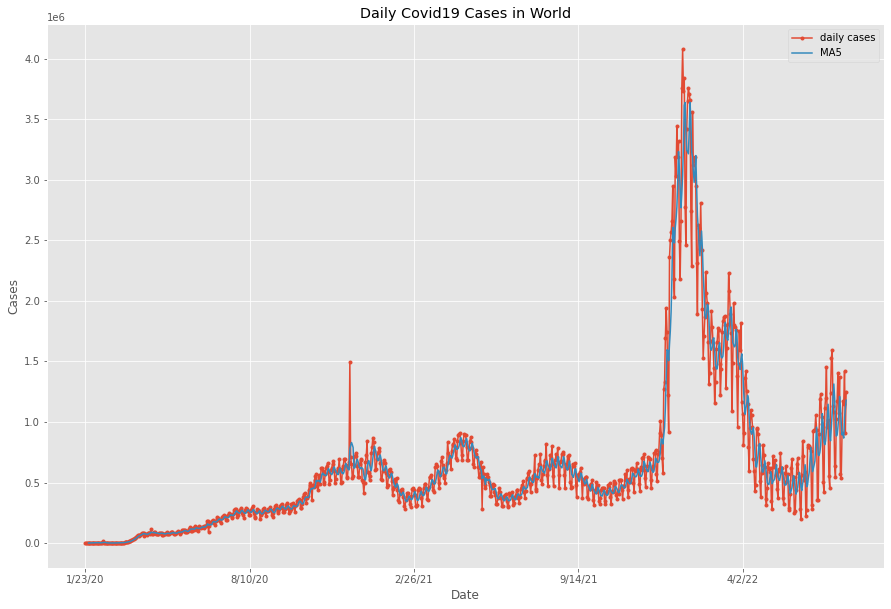

In [65]:
df.Cases.plot(title='Daily Covid19 Cases in World', marker='.', figsize=(15,10), label='daily cases')
df.Cases.rolling(window=5).mean().plot(figsize=(15,10), label='MA5')
plt.ylabel('Cases')
plt.legend()
plt.show()

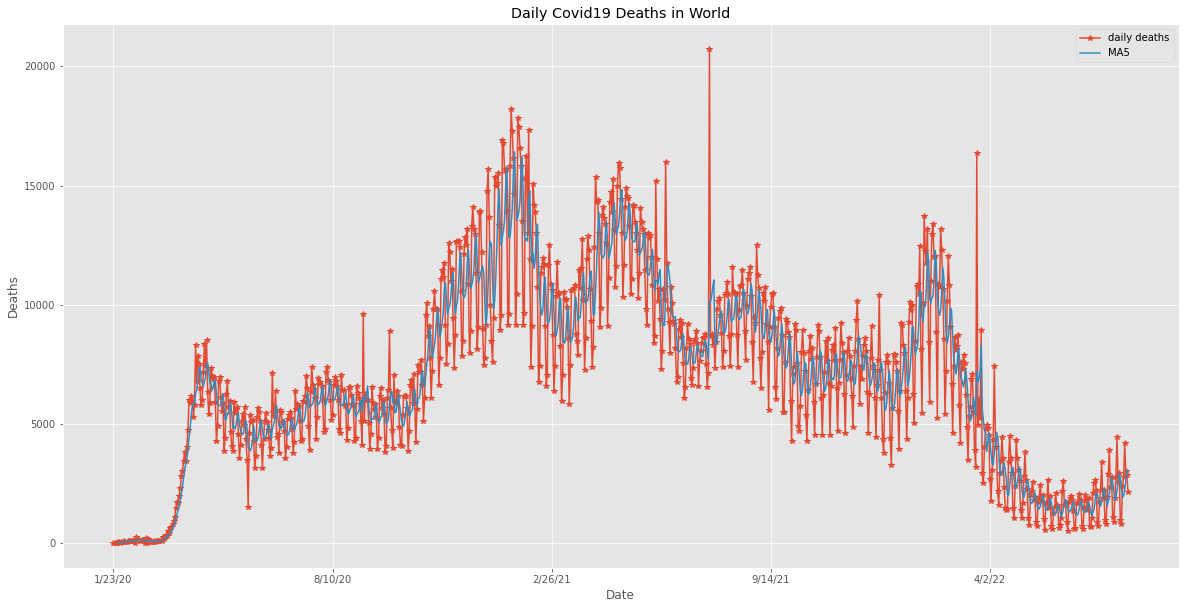

In [66]:
df.Deaths.plot(title='Daily Covid19 Deaths in World', marker='*', figsize=(20,10), label='daily deaths')
df.Deaths.rolling(window=5).mean().plot(figsize=(20,10), label='MA5')
plt.ylabel('Deaths')
plt.legend()
plt.show()

In [67]:
df.iloc[:,0].values

array([1.000000e+02, 2.870000e+02, 4.930000e+02, 6.830000e+02,
       8.090000e+02, 2.651000e+03, 5.890000e+02, 2.068000e+03,
       1.690000e+03, 2.111000e+03, 4.749000e+03, 3.100000e+03,
       4.012000e+03, 3.745000e+03, 3.162000e+03, 3.594000e+03,
       2.731000e+03, 3.031000e+03, 2.609000e+03, 2.043000e+03,
       4.180000e+02, 1.515200e+04, 6.528000e+03, 2.143000e+03,
       2.183000e+03, 2.035000e+03, 1.882000e+03, 5.000000e+02,
       5.610000e+02, 6.300000e+02, 1.762000e+03, 3.820000e+02,
       5.680000e+02, 8.540000e+02, 9.720000e+02, 1.344000e+03,
       1.424000e+03, 1.871000e+03, 2.379000e+03, 1.980000e+03,
       2.612000e+03, 2.322000e+03, 2.711000e+03, 3.930000e+03,
       4.131000e+03, 3.854000e+03, 4.323000e+03, 4.786000e+03,
       7.476000e+03, 6.756000e+03, 1.319400e+04, 1.088800e+04,
       1.123300e+04, 1.456700e+04, 1.517400e+04, 1.756100e+04,
       2.708700e+04, 2.953000e+04, 3.242700e+04, 3.421200e+04,
       4.255500e+04, 4.188500e+04, 5.147900e+04, 6.0815

In [69]:
df_fb = pd.DataFrame({'ds':[], 'y':[]})
df_fb['ds'] = pd.to_datetime(df.index)
df_fb['y'] = df.iloc[:,0].values

In [70]:
model = Prophet()
model.fit(df_fb)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [73]:
ypred = model.make_future_dataframe(periods=30, freq='D')
ypred

,ds
0,2020-01-23
1,2020-01-24
2,2020-01-25
3,2020-01-26
4,2020-01-27
...,...
952,2022-09-01
953,2022-09-02
954,2022-09-03
955,2022-09-04


In [77]:
r2_score(df_fb['y'], ypred[: len(df_fb['y'])])

UFuncTypeError: ignored